# Classification Probelm: Predict the chance of survival of a voager on

Titanic based on the voager’s information

Rafiq Islam  
2021-10-15

## The Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from mywebstyle import plot_style
plot_style('#f4f4f4')

titanic = pd.read_csv('titanic_train.csv')

## Exploratory Data Analysis

### Descriptive Statistics

In [2]:
titanic.head()

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Seems like there are some missing data for the `Age`, `Cabin`, and
`Emberked` features. To see with visualization

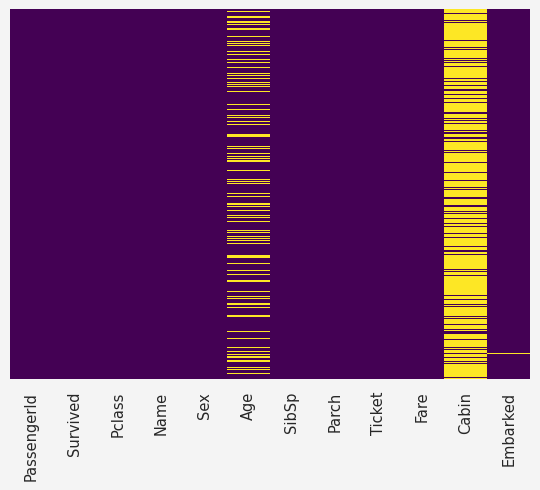

In [4]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Approximately $20\%$ of the `Age` variable is missing. For the feature
`Cabin`, it’s too many observations missing. For the `Emberked`, there
are only two missing observations. So, we need to take extra care of
these features in the data cleaning and preparation stage.

### Data Visualization

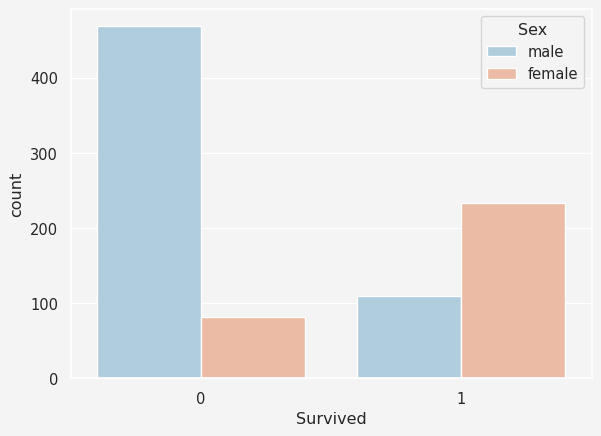

In [5]:
sns.countplot(x='Survived', hue='Sex', data= titanic, palette='RdBu_r')

Looks like maximum of the passenger who didn’t survived are male.

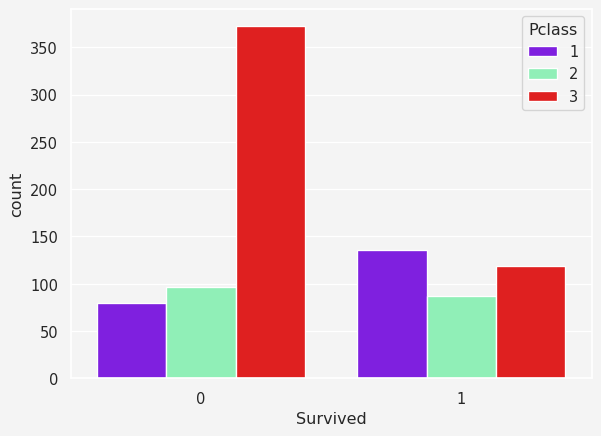

In [6]:
sns.countplot(x='Survived', hue='Pclass', data=titanic, palette='rainbow')

From this plot we see that people from class 3 has the highest
proportion who didn’t survive. In the survival class, passenger class 1
has the highest proportion.

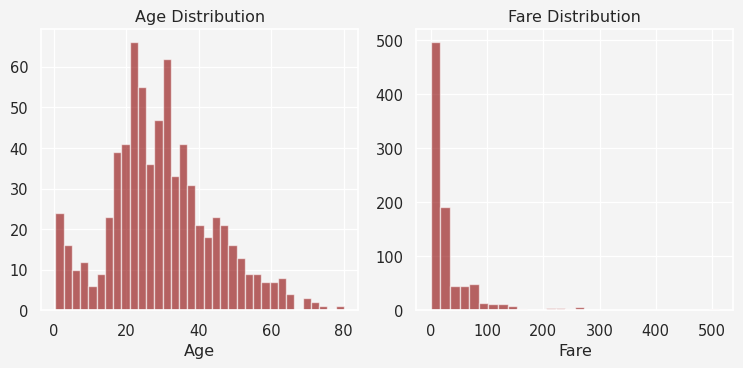

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.9, 4))
titanic['Age'].hist(bins=35, color='darkred', alpha=0.6, ax=ax1)
ax1.set_xlabel('Age')
ax1.set_title('Age Distribution')
titanic['Fare'].hist(bins=30, color='darkred', alpha=0.6, ax=ax2)
ax2.set_xlabel('Fare')
ax2.set_title('Fare Distribution')
plt.tight_layout()
plt.show()

Seems like `Age` is almost normally distributed. However, the the `Fare`
is positively skewed. Other categorical features

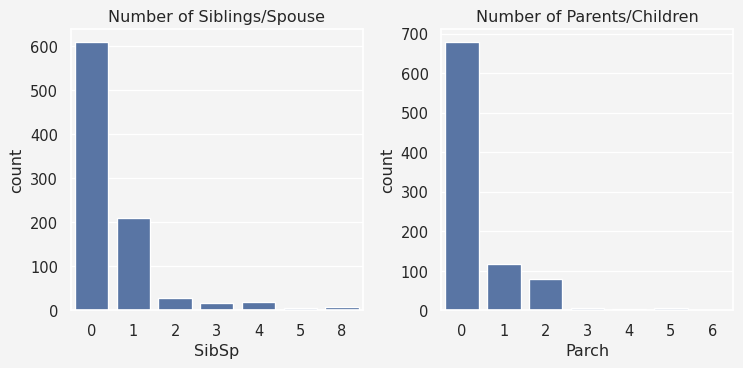

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.9, 4))


sns.countplot(
    x='SibSp',data=titanic, ax=ax1
    )
ax1.set_title('Number of Siblings/Spouse')


sns.countplot(
    x='Parch', data=titanic, ax=ax2
    )
ax2.set_title('Number of Parents/Children')

plt.tight_layout()
plt.show()

## Data Cleaning and Preparation

### Handling Missing Data

Here, the `Age` feature is a continuous feature and almost normally
distributed. So we can impute this by the mean of the `Age` variable.
However, this feature can be classified by other categorical features
such as `Sex`, `Pclass`, `SibSp`, or `Perch`. But we can be smarter by
taking consideration of greater and homogeneously diversified
categorical feature. In this case, `Pclass` is the perfect one.

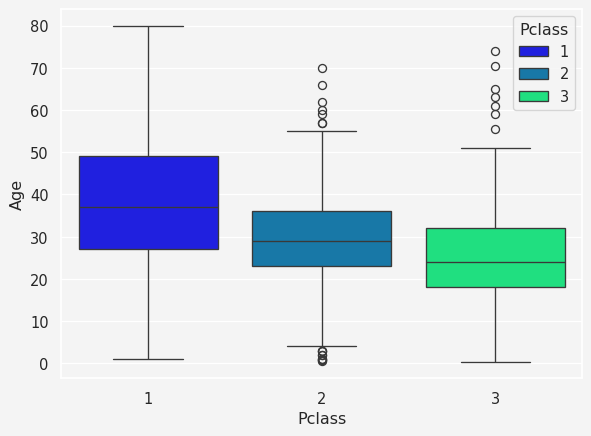

In [9]:
sns.boxplot(
    x='Pclass', y='Age', hue='Pclass',
    data=titanic, palette='winter'
    )

So, whenever a passenger is in the 1st class, the mean `Age` is around
37 and for the 2nd class and 3rd class the mean `Age` are 29 and 24,
respectively.

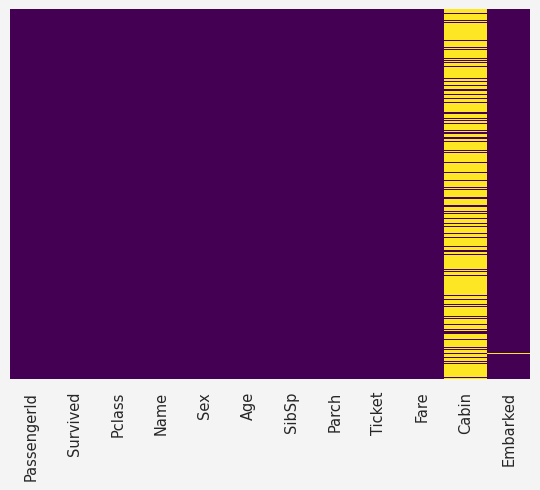

In [10]:
def age_imputation(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
titanic.Age = titanic[['Age','Pclass']].apply(age_imputation, axis=1)
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Since there are too many missing in `Cabin`, so we can drop it along
with two missing values from the `Emberked` feature.

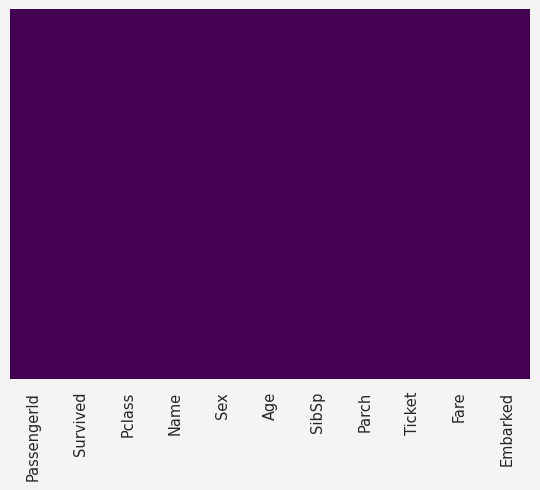

In [11]:
titanic.drop('Cabin', axis=1, inplace=True)
titanic.dropna(inplace=True)
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

So there is no missing value in any column. Next we convert the
categorical features

### Converting the Categorical Features

In [12]:
titanic['Male'] = pd.get_dummies(titanic.Sex,dtype=int)['male']
emb = pd.get_dummies(titanic['Embarked'],drop_first=True, dtype=int)
titanic = pd.concat([titanic, emb], axis=1)
titanic.drop(['Sex','Embarked','Name','Ticket'], axis = 1, inplace=True)
titanic.head()

## Modeling

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(
    titanic.drop('Survived', axis=1),
    titanic.Survived, test_size=0.30,
    random_state=123
    )
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)

/opt/hostedtoolcache/Python/3.10.18/x64/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


## Evaluation

In [14]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       161
           1       0.79      0.64      0.71       106

    accuracy                           0.79       267
   macro avg       0.79      0.76      0.77       267
weighted avg       0.79      0.79      0.79       267
